# Midterm (MACS 30150), February 11, 2019 [20 points total]
### Solutions
### Daniel Tracht
You will have an hour and fifty minutes to take this exam.
1. Put your name in the space provided above (without the brackets).
2. Download this notebook and accompanying data `MidtermScores.csv`.
3. The class will disconnect their wi-fi and begin taking the exam.
4. The exam is open computer, closed internet, open note.
5. Once you are done, you will signal to a TA or instructor to come over and monitor while you reconnect to the internet and upload your edited notebook to Canvas.

Remember that you must clearly indicate your answers to all questions below. We will give partial credit for partially correct answers. The midterm is worth 20 points (2 problem sets).

# 1. Symbolic and Numerical Derivatives [10 points total]
This exercise will use the following function. In a household savings problem, the marginal utility of consumption is an important function. If a household has a constant relative risk aversion utility function, the marginal utility functional form can be the following:
\begin{equation}
  MU(c_t) \equiv \bigl(c_t\bigr)^{-\sigma}
\end{equation}
where $c_t>0$ is current period consumption and $\sigma\geq 1$ is the coefficient of constant relative risk aversion.

Assume the budget constraint every period is $c_t + b_{t+1} = (1+r_t)b_t + w_t$, where $b_t$ is the initial wealth in period $t$, $b_{t+1}$ is the savings chosen in period $t$ that comes back to the household in period $t+1$ with interest, and $w_t$ is the wage paid on the unit of inelastically supplied labor. Then we can rewrite the marginal utility of consumption above with the budget constraint substituted in.
\begin{equation}
  MU = \Bigl([1 + r_t]b_t + w_t - b_{t+1}\Bigr)^{-\sigma}
\end{equation}


## 1a) Plot the MU(c) function for different consumption values [2 points]
Assume that the coefficient of relative risk aversion is $\sigma = 1.8$. Use Python to plot the marginal utility of consumption for 100 equally spaced consumption values between 0.7 and 5.0. Make sure your plot has an $x$-axis labeled "consumption" and a $y$-axis labeled "marginal utility".

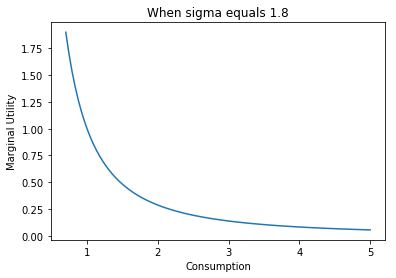

In [51]:
import matplotlib.pyplot as plt

x_values = np.linspace(0.7, 5.0, 100)

def MU_1 (consumption, sigma):
    return (consumption**(-sigma))
plt.plot(x_values, MU_1(x_values, 1.8))
plt.title("When sigma equals 1.8")
plt.xlabel("Consumption")
plt.ylabel("Marginal Utility")

plt.show()


## 1b) Symbolic numerical derivative [2 points]
Assume the version of the marginal utility above that has the budget constraint substituted in.
\begin{equation}
  MU = \Bigl([1 + r_t]b_t + w_t - b_{t+1}\Bigr)^{-\sigma}
\end{equation}
Use Python's symbolic math package `sympy` to compute the analytical derivative of the marginal utility function with respect to beginning-of-period wealth $b_t$. This will involve you declaring each variable and parameter as a symbol, then specifying the $MU$ funtion to be differentiated. The solution should be a function of all the variables and parameters $(b_t, b_{t+1}, r_t, w_t, \sigma)$. Leave the output in the form that `sympy` produces.

In [1]:
import sympy as sy

# declare each variable and parameter as a symbol
b_t = sy.symbols("b_t")
b_t1 = sy.symbols("b_t1")
r_t = sy.symbols("r_t")
w_t = sy.symbols("w_t")
sigma = sy.symbols("sigma")

# Specify the MU function to be differentiated
def MU(b_t, b_t1, r_t, w_t, sigma):
    return ( ((1+r_t)*b_t + w_t - b_t1)**(-sigma) )

#
def MU_prime(b_t, b_t1, r_t, w_t, sigma):
    return sy.diff(MU(b_t, b_t1, r_t, w_t, sigma), b_t)

## 1c) Write a function that produces the analytical derivative [3 points]
Write a function that takes five inputs which are the values for the variables and parameters of the marginal utility $(b_t, b_{t+1}, r_t, w_t, \sigma)$ and returns the analytical derivative of the marginal utility (scalar) with respect to beginning-of-period wealth $b_t$ associated with those values. Show your function definition in the cell below. Name your function `dMU_c`. Print out the value of the function for the following three combinations of variables and parameters.

$$ \frac{\partial MU_1}{\partial b_t}:\quad b_t=1.0, \:\: b_{t+1}=0.8, \:\: r_t=0.04, \:\: w_t=1.2, \:\: \sigma=2.2 $$

$$ \frac{\partial MU_2}{\partial b_t}:\quad b_t=5.0, \:\: b_{t+1}=2.1, \:\: r_t=0.01, \:\: w_t=1.8, \:\: \sigma=2.0 $$

$$ \frac{\partial MU_3}{\partial b_t}:\quad b_t=3.3, \:\: b_{t+1}=3.4, \:\: r_t=0.03, \:\: w_t=1.0, \:\: \sigma=1.8 $$

In [78]:
# get analytical derivative from above in lamdified form
lam_prime = sy.lambdify((b_t, b_t1, r_t, w_t, sigma), MU_prime(b_t, b_t1, r_t, w_t, sigma), "numpy")

# function that takes five inputs
# returns the analytical derivative at given inputs
def dMU_c(b_t, b_t1, r_t, w_t, sigma):
    # evaluate at given values and return
    return lam_prime(b_t, b_t1, r_t, w_t, sigma)
    
print("For the first set:", dMU_c(1, 0.8, 0.04, 1.2, 2.2))
print("For the second set:", dMU_c(5, 2.1, 0.01, 1.8, 2.0))
print("For the third set:", dMU_c(3.3, 3.4, 0.03, 1.0, 1.8))

For the first set: -0.7123542921746638
For the second set: -0.018848228604752878
For the third set: -1.8592010790841615


## 1d) Compute the numerical derivative approximation [3 points]
Use the centered second-order finite difference approximation of the derivative to calculate the numerical derivative of the marginal utility function.

$$ f'(x_0)\approx \frac{\bigl(f(x_0 +h)\bigr) - \bigl(f(x_0 - h) \bigr)}{2h} $$

Recall that our marginal utility function is a function of four variables and the parameter $\sigma$.
\begin{equation}
  MU = \Bigl([1 + r_t]b_t + w_t - b_{t+1}\Bigr)^{-\sigma}
\end{equation}
So we want to approximate the derivative of the marginal utility with respect to beginning-of-period wealth $\partial MU(c)/\partial b_t$ by using the centered second-order finite difference approximation above. A helpful hint on how to do this is the marginal utility function is like $f(x)$ and the derivative is the centered second-order approximation equation.

Define a function named `dMU_c_approx` that takes as inputs the five variables and parameters $(b_t, b_{t+1}, r_t, w_t, \sigma)$ as well as a finite difference amount $h$. Have this function return the centered second-order approximation of the derivative of the marginal utility function with respect to beginning-of-period wealth.

Using your `dMU_c` function from part (c), print the analytical derivative of the marginal utility function with respect to beginning-of-period wealth with the following parameterization.

$$ \frac{\partial MU}{\partial b_t}:\quad b_t=1.0, \:\: b_{t+1}=0.8, \:\: r_t=0.04, \:\: w_t=1.2, \:\: \sigma=2.2 $$

Use your `dMU_c_approx` function to print out the numerical approximation of the derivative for the specification above with the following three finite difference amounts: $h_1 = 0.1$, $h_2= 0.001$ and  $h_3=0.00001$.

In [79]:
# get analytical function from above in lamdified form
lam = sy.lambdify((b_t, b_t1, r_t, w_t, sigma), MU(b_t, b_t1, r_t, w_t, sigma), "numpy")

# funcation that takes five parameters and finite difference amount h
# returns centered second-order approximation of the derivative

def dMU_c_approx(b_t, b_t1, r_t, w_t, sigma, h):
    first_term = lam(b_t+h, b_t1, r_t, w_t, sigma)
    second_term = lam(b_t-h, b_t1, r_t, w_t, sigma)
    approx = (first_term - second_term) / (2*h)
    return approx

print("Analytically:", dMU_c(1, 0.8, 0.04, 1.2, 2.2))
print("With h = 0.1:", dMU_c_approx(1, 0.8, 0.04, 1.2, 2.2, 0.1))
print("With h = 0.001:", dMU_c_approx(1, 0.8, 0.04, 1.2, 2.2, 0.001))
print("With h = 0.00001:", dMU_c_approx(1, 0.8, 0.04, 1.2, 2.2, 0.00001))

    
    

Analytically: -0.7123542921746638
With h = 0.1: -0.720747904181559
With h = 0.001: -0.7123551244865578
With h = 0.00001: -0.7123542922538028


# 2. Maximum likelihood estimation [10 points total]
This exercise will make use of the `MidtermScores.csv` dataset, which contains 97 observations of students' midterm scores $scores_i$ as well as the number of hours they studied for the midterm $hours_i$ and whether the midterm was within a week of Chinese New Year $ch\_ny_i$.

* `scores`: score of $i$th student on midterm
* `hours`: number of hours that $i$th student studied for the midterm
* `ch_ny`: =1 if the midterm was within a week of Chinese New Year, =0 otherwise

You can load these data into Python as a numpy array using the `np.loadtxt()` command.

In [2]:
import numpy as np

data = np.loadtxt('MidtermScores.csv', delimiter=',', skiprows=1)
print('Shape of the data=', data.shape)
scores = data[:, 0]
hours = data[:, 1]
ch_ny = data[:, 2]

Shape of the data= (97, 3)


Assume that our model of student midterm scores is the following linear model.

$$ scores_i = \beta_0 + \beta_1 hours_i + \beta_2 ch\_ny_i + \varepsilon_i \quad\text{where}\quad \varepsilon_i\sim N(0,\sigma) $$

where the error $\varepsilon_i$ are normally distributed with mean 0 and standard deviation $\sigma$.

## 2a) Log likelihood function [3 points]
Define a function named `log_lik` that takes as inputs three data vectors $scores_i$, $hours_i$, $ch\_ny_i$, three coefficient parameters $\beta_0$, $\beta_1$, $\beta_2$, and the standard deviation $\sigma$ of the normally distributed errors and returns the log likelihood (a scalar). Print the log likelihood value for the first 10 data observations given all the coefficients are equal to one $\beta_0, \beta_1, \beta_2=1.0$ and the standard deviation of the errors is equal to $\sigma=0.5$. For the answer to this question, I want to see a function and one scalar log-likelihood value.

In [3]:
import scipy.stats as sts

# function that takes three vectors of data, three beta parameters, and sigma parameter
# returns the log likelihood for that vector for the normal distribution with mean 0
def log_lik(b0, b1, b2, sigma, scores, hours, ch_ny):
    # calculates epsilon values for beta vector and data
    epsilon_vals = scores - b0 - b1*hours - b2*ch_ny
    # using the np.float64 specification to avoid the round to zero error from the sts.norm.pdf
    pdf_vals = np.float64((1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(epsilon_vals) ** 2 / (2 * sigma ** 2)))
    # using the normal pdf from the scipy library
    # pdf_vals = sts.norm.pdf(epsilon_vals, sigma)
    log_pdf_vals = np.log(pdf_vals)
    log_likelihood = log_pdf_vals.sum()
    return log_likelihood

# print log lik for first 10 observations given all coefficients are equal to 1 and sd of errors are equal to 1/2
scalar = log_lik(1, 1, 1, 0.5, scores[0:10:,], hours[0:10,], ch_ny[0:10,] )
print(scalar)

-186.8990404522523


## 2b) Estimate the parameters by MLE [7 points]
Estimate the four parameters $\beta_0, \beta_1, \beta_2, \sigma$ to maximize the log likelihood from part (a). Remember that a minimizer will have to minimize the negative of the log likelihood. Use all 97 observations for this estimation. Use an initial guess of $\beta_0=10.0$, $\beta_1=1.0$, $\beta_2=1.0$, and $\sigma=$ the standard deviation of the $scores_i$ variable. Report your estimated coefficients $\beta_0, \beta_1, \beta_2$ and standard deviation $\sigma$. What is the predicted effect on a midterm score of a student who takes the test around Chineses New Year $ch\_ny_i=1$ versus the score of a student who does not take the test around Chinese New year $ch\_ny_i=0$, other things being equal?

In [9]:
# a critereon function to be passed to the minimizer
def crit_normal(params, *args):
    b0, b1, b2, sigma = params
    scores, hours, ch_ny = args
    log_likelihood_value = log_lik(b0, b1, b2, sigma, scores, hours, ch_ny)
    neg_log_likelihood_value = -log_likelihood_value
    return neg_log_likelihood_value

import scipy.optimize as opt

# starting from given points
beta_0_init = 10
beta_1_init = 1
beta_2_init = 1
sigma_scores = (scores.var())**(1/2)
sigma_init = sigma_scores
params_init = np.array([beta_0_init, beta_1_init, beta_2_init, sigma_init])
mle_args = (scores, hours, ch_ny)

#results = opt.minimize(crit_normal, params_init, args=(mle_args))
bnds = ((None, None), (None, None) ,(None, None), (1e-1, None))
#results = opt.minimize(crit_normal, params_init, args=(mle_args), method = "L-BFGS-B", bounds = bnds)
results = opt.minimize(crit_normal, params_init, args=(mle_args))
beta_0_MLE, beta_1_MLE, beta_2_MLE, sigma_MLE = results.x
print("Estimated beta_0:", beta_0_MLE)
print("Estimated beta_1:", beta_1_MLE)
print("Estimated beta_2:", beta_2_MLE)
print("This is also the predicted effect on a midterm score of a student who takes the test around Chinese New Year, ceterus paribus")
print("Estimated standard deviation:", sigma_MLE)
results

Estimated beta_0: 4.750441590920506
Estimated beta_1: 0.7157362210284862
Estimated beta_2: -1.8909272951387512
This is also the predicted effect on a midterm score of a student who takes the test around Chinese New Year, ceterus paribus
Estimated standard deviation: 0.6527539776528203


      fun: 96.26120579658213
 hess_inv: array([[ 1.53444027e-01, -9.58553907e-03, -9.66205617e-03,
        -7.86492031e-04],
       [-9.58553907e-03,  6.68615600e-04, -4.56805531e-04,
         4.08935946e-05],
       [-9.66205617e-03, -4.56805531e-04,  2.27855848e-02,
         1.64912534e-04],
       [-7.86492031e-04,  4.08935946e-05,  1.64912534e-04,
         2.09626941e-03]])
      jac: array([9.53674316e-07, 2.86102295e-06, 9.53674316e-07, 1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 168
      nit: 22
     njev: 28
   status: 0
  success: True
        x: array([ 4.75044159,  0.71573622, -1.8909273 ,  0.65275398])